In [ ]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


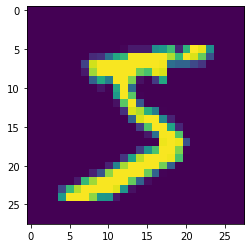

In [ ]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)


Epoch 1/3
1875/1875 [==============================] - 194s 95ms/step - loss: 0.7920 - accuracy: 0.9123 - val_loss: 0.0712 - val_accuracy: 0.9753
Epoch 2/3
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0686 - accuracy: 0.9789 - val_loss: 0.0698 - val_accuracy: 0.9786
Epoch 3/3
1875/1875 [==============================] - 175s 93ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.0742 - val_accuracy: 0.9771


In [ ]:
model.predict(X_test[:4])


array([[1.3198556e-06, 2.6605452e-12, 2.0863780e-07, 3.2913879e-06,
        1.2927464e-09, 6.3344024e-11, 5.7655947e-14, 9.9999475e-01,
        3.0171933e-07, 7.8730373e-09],
       [2.4302386e-07, 1.0904191e-03, 9.9888498e-01, 8.2455284e-07,
        6.3691048e-09, 5.6760954e-11, 2.3501168e-05, 7.4971925e-11,
        1.5567075e-07, 1.7770348e-14],
       [6.9404578e-06, 9.9970102e-01, 1.5308943e-06, 3.6095972e-08,
        2.4191841e-05, 6.3185843e-07, 1.7290579e-07, 9.6163853e-07,
        2.6452946e-04, 4.1478355e-08],
       [9.9999225e-01, 1.3594177e-11, 6.8887385e-07, 4.6047843e-11,
        5.1290169e-08, 1.2668498e-07, 6.0149232e-06, 6.3646866e-08,
        7.4866233e-07, 6.9333147e-08]], dtype=float32)